In [1]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, cluster_optics_dbscan 

In [2]:
df = pd.read_csv(r'study-modelling_perceptual_organization_in_abstract_art_using_eye_tracking_data-fa93c38a-c549-4ba4-955f-4f5bc89c0ea4-raw-gazes.csv') # Get Fixations
df = df.drop(columns=['notes','tester_age', 'tester_gender', 'test_id', 'test_created_at', 'tester_quality_grade_item'], axis=1) # Drop columns not needed
print(df.head())

                              tester_id  tester_quality_grade  \
0  b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2                     3   
1  9274651b-6309-41fc-bfa5-d5b65fb6e558                     3   
2  b6962f63-488d-4702-9a5f-ec31feef48c8                     2   
3  b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2                     3   
4  9274651b-6309-41fc-bfa5-d5b65fb6e558                     3   

                                item_id  test_duration_ms  \
0  4bbc9efa-84b6-4a92-95dc-64a71bcf7a83             47313   
1  4bbc9efa-84b6-4a92-95dc-64a71bcf7a83             59985   
2  4bbc9efa-84b6-4a92-95dc-64a71bcf7a83             59979   
3  8f8c5025-9d47-4965-b61c-085e58a28ce3             60009   
4  8f8c5025-9d47-4965-b61c-085e58a28ce3             60005   

   test_browser_width_px  test_browser_height_px  \
0                   1440                     900   
1                   1366                     768   
2                   1366                     768   
3                   1440          

In [3]:
participants = df['tester_id'].unique().tolist() # Get participant list
print(participants)

prints = df['item_id'].unique().tolist() #Get art print list
print(prints)

grouped = df.groupby(df['tester_id']) # Group gaze data per participant

['b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2', '9274651b-6309-41fc-bfa5-d5b65fb6e558', 'b6962f63-488d-4702-9a5f-ec31feef48c8']
['4bbc9efa-84b6-4a92-95dc-64a71bcf7a83', '8f8c5025-9d47-4965-b61c-085e58a28ce3', '4f491ba6-7c38-465d-a426-6248e85d4a6b', 'fba55bd9-8595-4c4a-b8d1-5e82f5db22e5', '75181c30-87dd-4553-99e7-94193c282715', '95f203a5-9c58-4812-86ff-eefdbaca3d11']


Participant ID: b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2


Art Print ID: 4bbc9efa-84b6-4a92-95dc-64a71bcf7a83


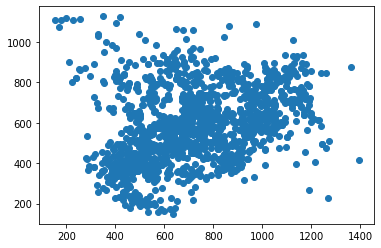

Art Print ID: 8f8c5025-9d47-4965-b61c-085e58a28ce3


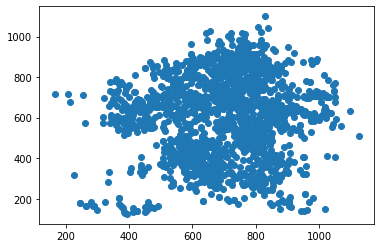

Art Print ID: 4f491ba6-7c38-465d-a426-6248e85d4a6b


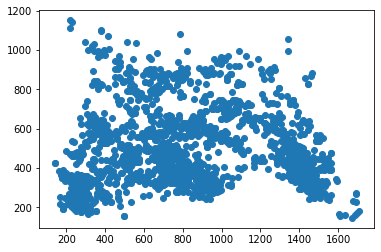

Art Print ID: fba55bd9-8595-4c4a-b8d1-5e82f5db22e5


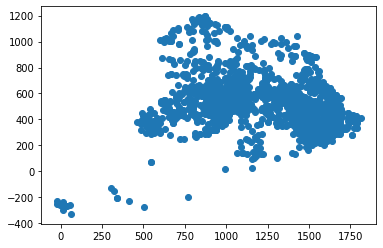

Art Print ID: 75181c30-87dd-4553-99e7-94193c282715


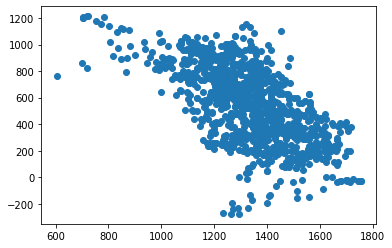

Art Print ID: 95f203a5-9c58-4812-86ff-eefdbaca3d11


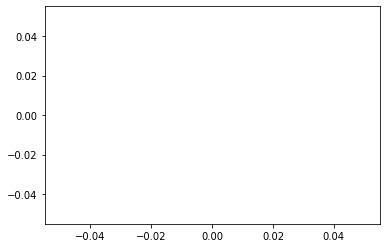


_________________________________________________________

Participant ID: 9274651b-6309-41fc-bfa5-d5b65fb6e558


Art Print ID: 4bbc9efa-84b6-4a92-95dc-64a71bcf7a83


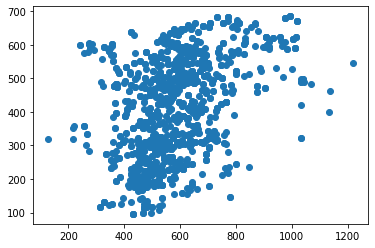

Art Print ID: 8f8c5025-9d47-4965-b61c-085e58a28ce3


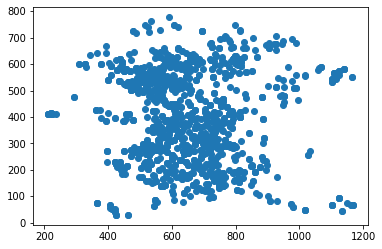

Art Print ID: 4f491ba6-7c38-465d-a426-6248e85d4a6b


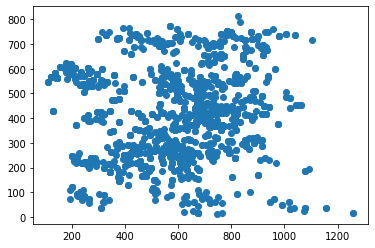

Art Print ID: fba55bd9-8595-4c4a-b8d1-5e82f5db22e5


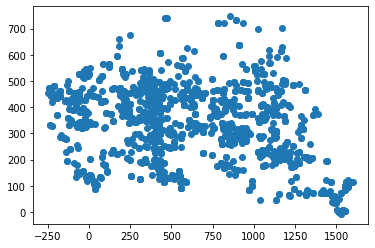

Art Print ID: 75181c30-87dd-4553-99e7-94193c282715


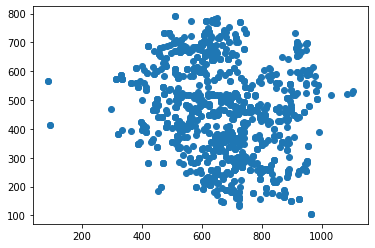

Art Print ID: 95f203a5-9c58-4812-86ff-eefdbaca3d11


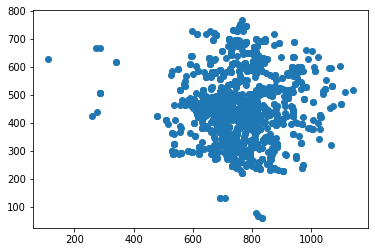


_________________________________________________________

Participant ID: b6962f63-488d-4702-9a5f-ec31feef48c8


Art Print ID: 4bbc9efa-84b6-4a92-95dc-64a71bcf7a83
Error: cannot reshape array of size 1633 into shape (6)
Art Print ID: 8f8c5025-9d47-4965-b61c-085e58a28ce3
Error: setting an array element with a sequence.
Art Print ID: 4f491ba6-7c38-465d-a426-6248e85d4a6b


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


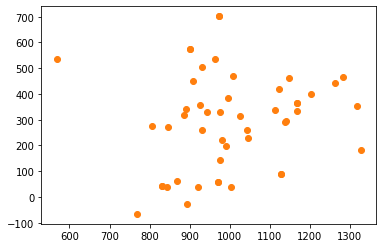

Art Print ID: fba55bd9-8595-4c4a-b8d1-5e82f5db22e5


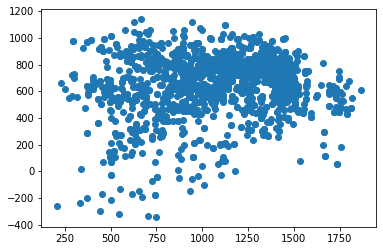

Art Print ID: 75181c30-87dd-4553-99e7-94193c282715


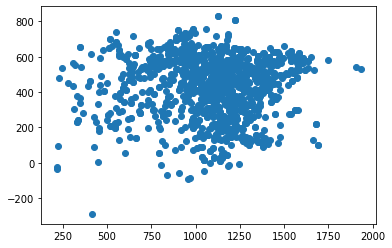

Art Print ID: 95f203a5-9c58-4812-86ff-eefdbaca3d11


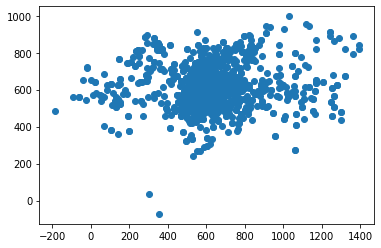


_________________________________________________________



In [4]:
# Create array for clustering
X = []

# View participant gaze per art print
for participant in participants:
    print("Participant ID: {}".format(participant))
    print("\n")
    participant_data = grouped.get_group(participant) # Get values for the participant
    participant_data_per_artprint = participant_data.groupby(participant_data['item_id']) # Group gaze data per participant
    
    aprints = []
    
    for artprint in prints:
#         img = plt.imread("Resized/{}".format(artprint))
#         plt.imshow(img, zorder=0, extent=[0.5, 8.0, 1.0, 7.0]) # Get image of artprint as plot background
        print( "Art Print ID: {}".format(artprint))
        try:
            participant_artprint_data = participant_data_per_artprint.get_group(artprint) # Get participant fixations for art print
            raw_data = participant_artprint_data['test_raw_data']
            raw_data = eval(raw_data.values.tolist()[0]) # Convert array inside of string as array object
            raw_data = np.reshape(raw_data, (-1,6)) # Convert 1D array to 2D array
            
            plt.scatter(raw_data[:,0], raw_data[:,1], zorder=1)
            plt.show() # Show fixations of participant for each art print
            
            coordinates = []
            
            for row in raw_data:
#                 print(row)
                x_coordinates = row[0]
                y_coordinates = row[1]
                time_viewed = row[2]
                coordinates.append([x_coordinates, y_coordinates])
        except Exception as e:
            print("Error: {}".format(e))
        
        aprints.append([artprint, coordinates])
            
    print("\n_________________________________________________________\n")
    
    X.append([participant, aprints])

Participant ID: b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2
  Art Print ID: 4bbc9efa-84b6-4a92-95dc-64a71bcf7a83


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


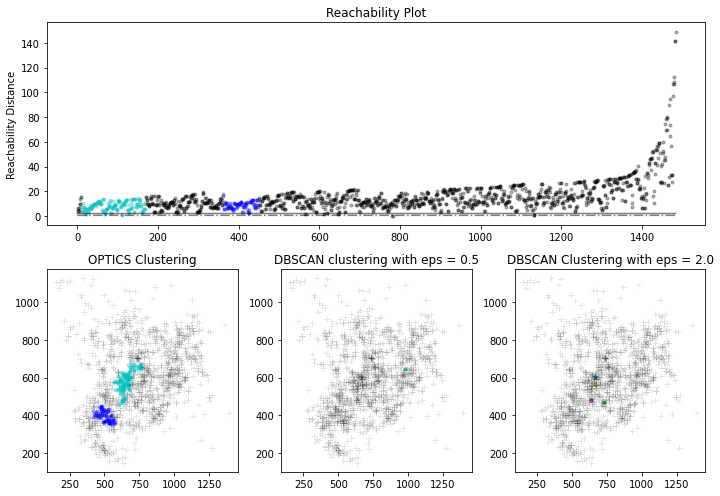



  Art Print ID: 8f8c5025-9d47-4965-b61c-085e58a28ce3


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


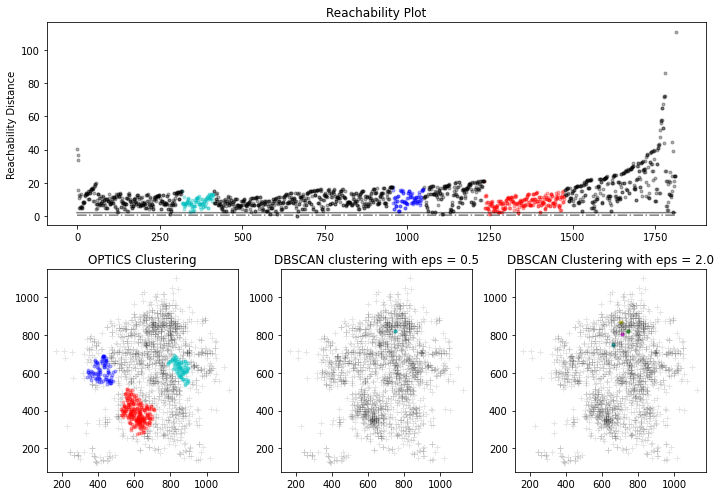



  Art Print ID: 4f491ba6-7c38-465d-a426-6248e85d4a6b
[-1 -1 -1 ... -1 -1 -1]


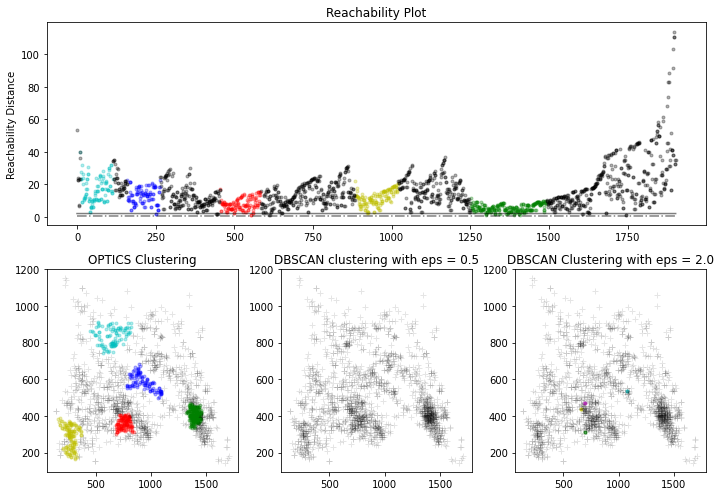



  Art Print ID: fba55bd9-8595-4c4a-b8d1-5e82f5db22e5


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


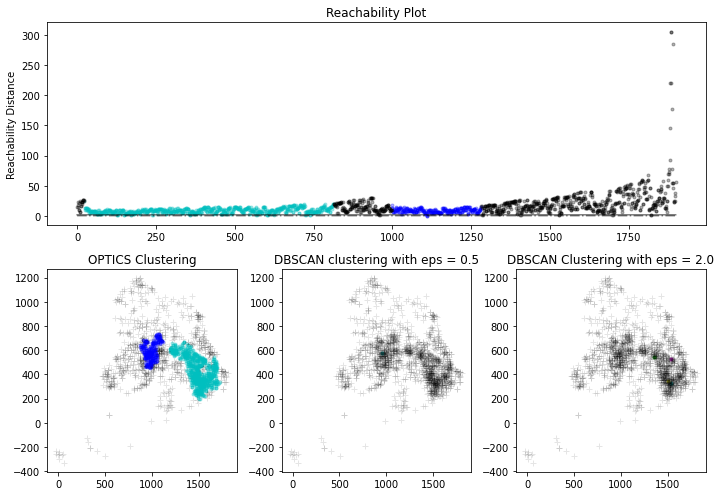



  Art Print ID: 75181c30-87dd-4553-99e7-94193c282715
[ 0  0  0 ... -1 -1 -1]


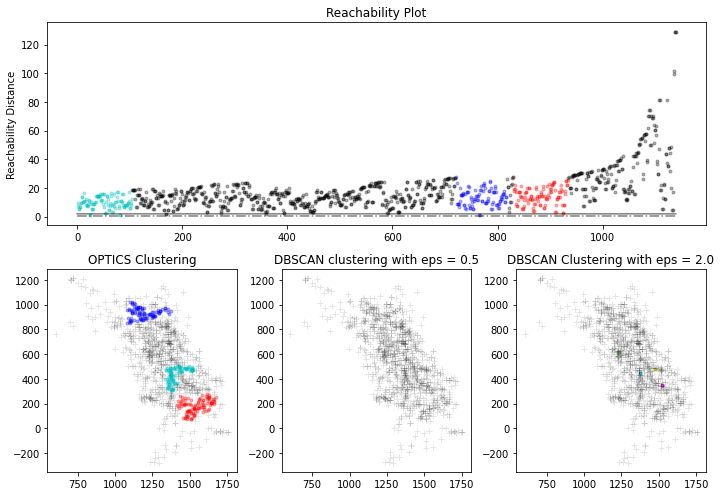



  Art Print ID: 95f203a5-9c58-4812-86ff-eefdbaca3d11
Error: at least one array or dtype is required


_______________________________

Participant ID: 9274651b-6309-41fc-bfa5-d5b65fb6e558
  Art Print ID: 4bbc9efa-84b6-4a92-95dc-64a71bcf7a83


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


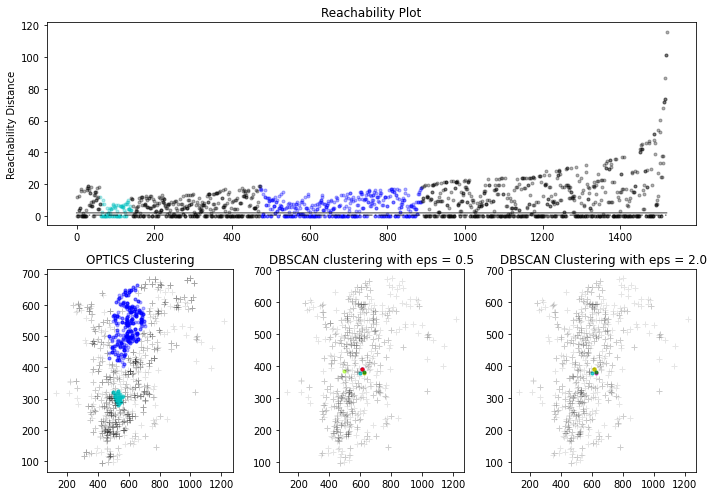



  Art Print ID: 8f8c5025-9d47-4965-b61c-085e58a28ce3


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


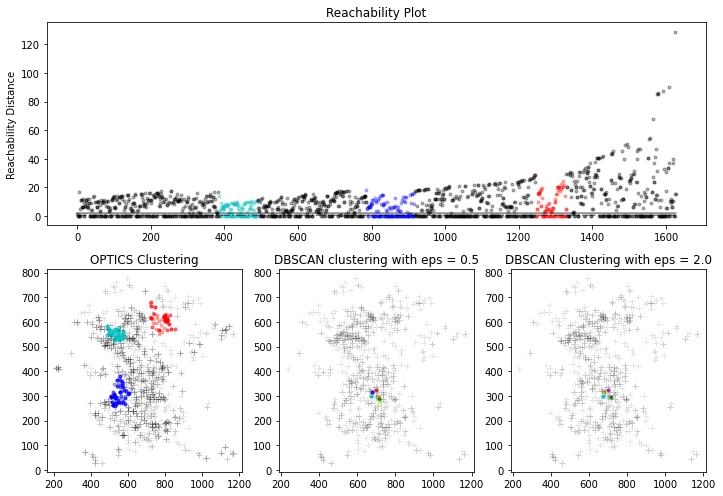



  Art Print ID: 4f491ba6-7c38-465d-a426-6248e85d4a6b


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[ 0  0  0 ... -1 -1 -1]


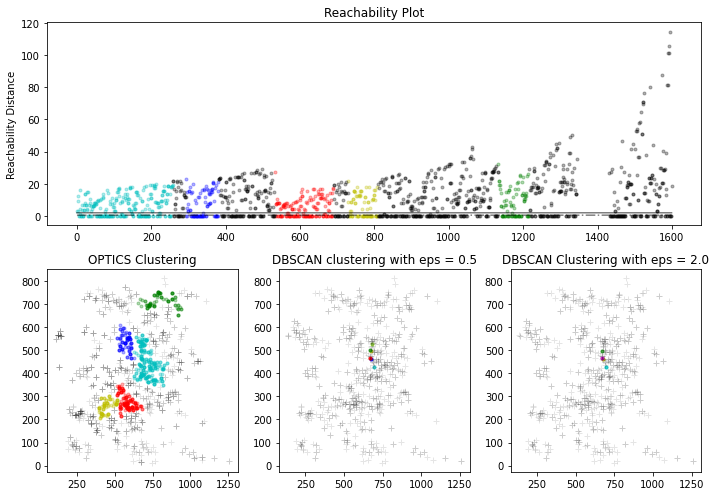



  Art Print ID: fba55bd9-8595-4c4a-b8d1-5e82f5db22e5


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[ 0  0  0 ... -1 -1 -1]


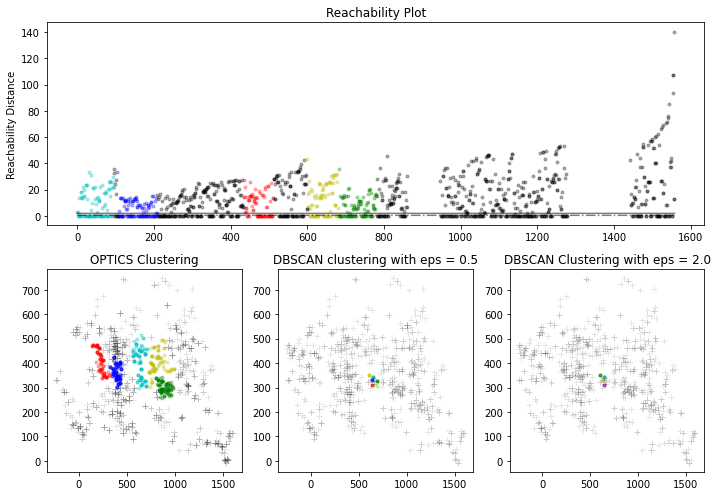



  Art Print ID: 75181c30-87dd-4553-99e7-94193c282715


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[ 0  0  0 ... -1 -1 -1]


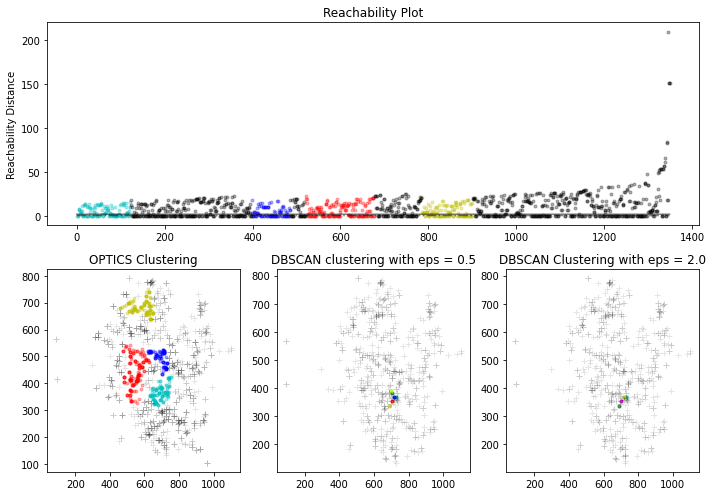



  Art Print ID: 95f203a5-9c58-4812-86ff-eefdbaca3d11


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


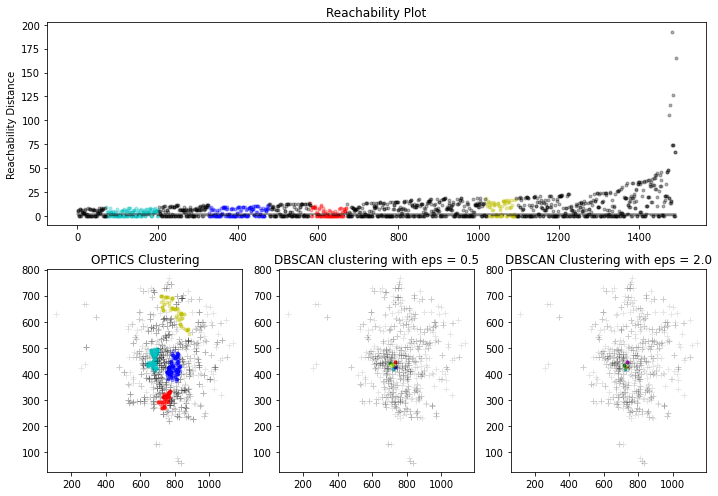



_______________________________

Participant ID: b6962f63-488d-4702-9a5f-ec31feef48c8
  Art Print ID: 4bbc9efa-84b6-4a92-95dc-64a71bcf7a83


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


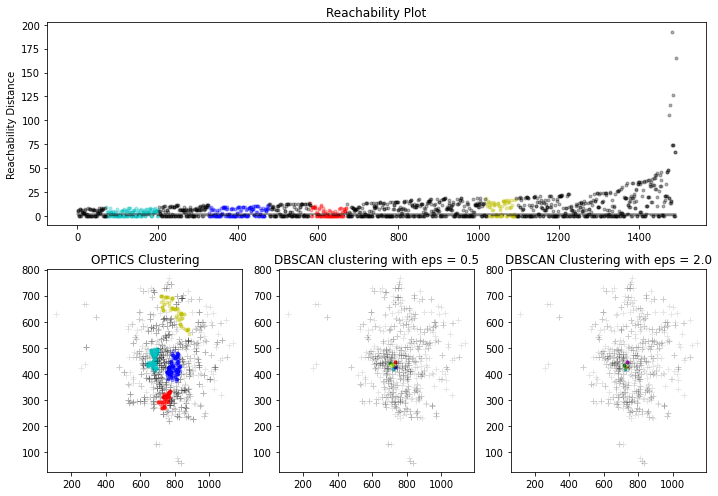



  Art Print ID: 8f8c5025-9d47-4965-b61c-085e58a28ce3


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


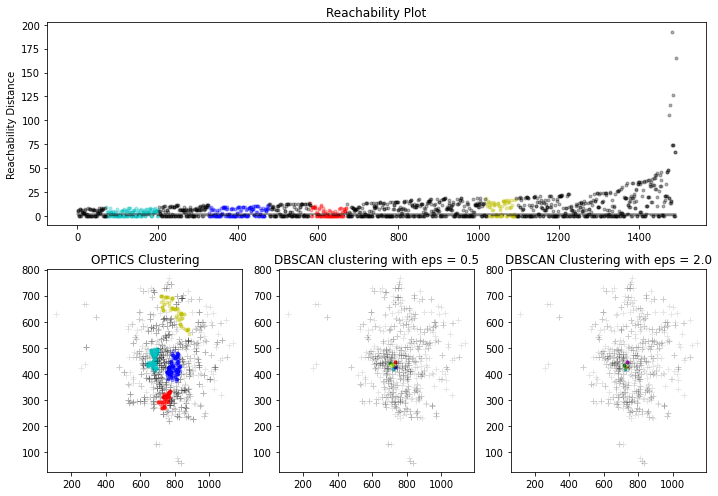



  Art Print ID: 4f491ba6-7c38-465d-a426-6248e85d4a6b
[-1  0  0  0  0  0  0 -1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  3  3
  3 -1  4  4  4  4 -1  5  5  5  5  5  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


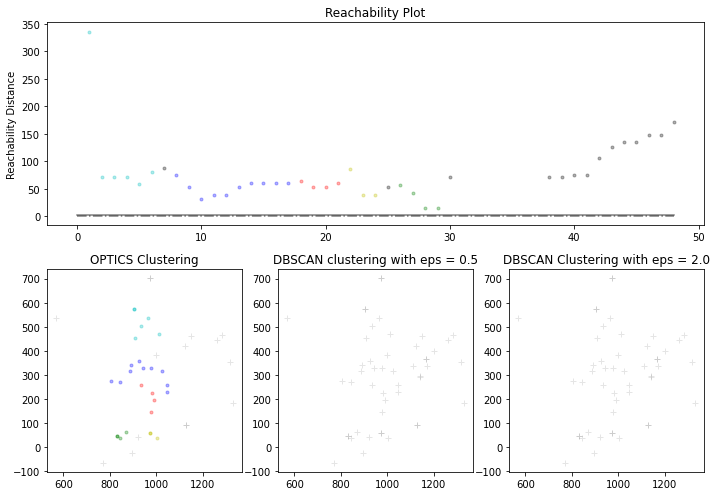



  Art Print ID: fba55bd9-8595-4c4a-b8d1-5e82f5db22e5


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


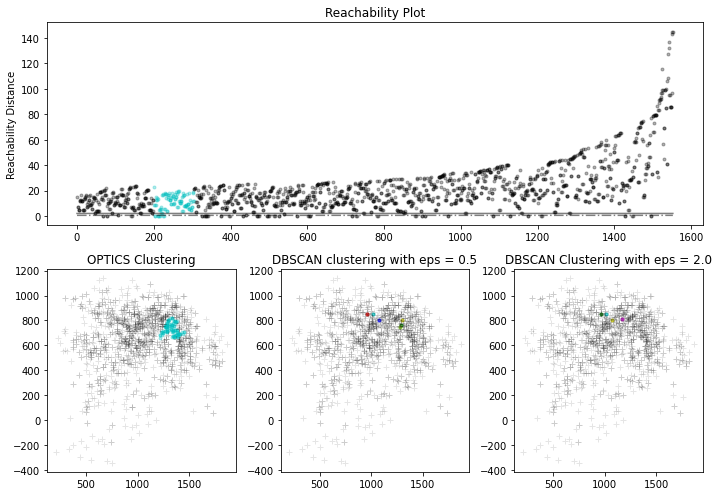



  Art Print ID: 75181c30-87dd-4553-99e7-94193c282715


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


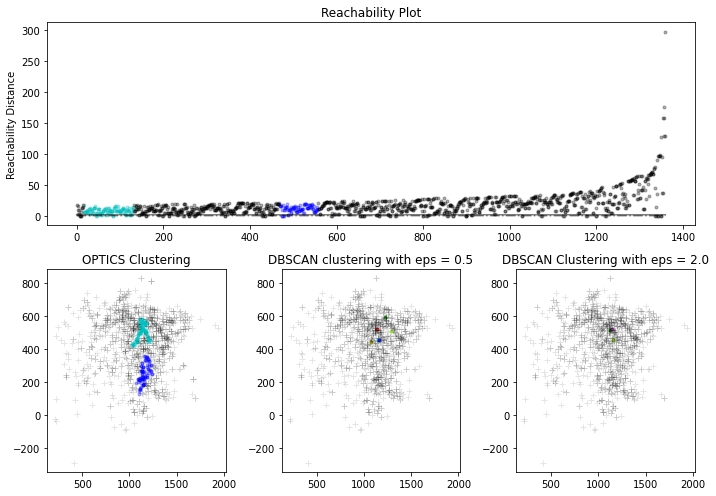



  Art Print ID: 95f203a5-9c58-4812-86ff-eefdbaca3d11


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[-1 -1 -1 ... -1 -1 -1]


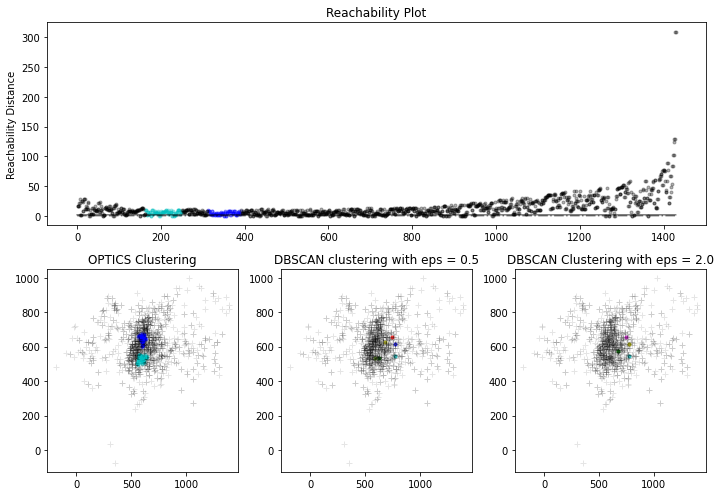



_______________________________



In [10]:
for participant in X:
    print("Participant ID: " + participant[0])
    artprints = participant[1]
    for artprint in artprints:
        print("  Art Print ID: " + artprint[0])
        gaze_data = artprint[1]
        gaze_data = pd.DataFrame(gaze_data)
        
        try:
            """
            BUILD & TRAIN THE CLUSTERING MODEL
            """
            optics_model = OPTICS(min_samples=3, xi=.05, min_cluster_size=.05)
            optics_model.fit(gaze_data)
            
            """
            STORE RESULT OF TRAINING
            """ 
            # Producing the labels according to the DBSCAN technique with eps = 0.5 
            labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                               core_distances = optics_model.core_distances_, 
                                               ordering = optics_model.ordering_, eps = 0.5) 

            # Producing the labels according to the DBSCAN technique with eps = 2.0 
            labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                               core_distances = optics_model.core_distances_, 
                                               ordering = optics_model.ordering_, eps = 2) 
            space = np.arange(len(gaze_data))
            reachability = optics_model.reachability_[optics_model.ordering_]
            labels = optics_model.labels_[optics_model.ordering_]
            
            print(labels)
            
            """
            VISUALIZATION
            """ 
            # Defining the framework of the visualization 
            plt.figure(figsize =(10, 7)) 
            G = gridspec.GridSpec(2, 3) 
            ax1 = plt.subplot(G[0, :]) 
            ax2 = plt.subplot(G[1, 0]) 
            ax3 = plt.subplot(G[1, 1]) 
            ax4 = plt.subplot(G[1, 2]) 

            # Plotting the Reachability-Distance Plot 
            colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
            for Class, colour in zip(range(0, 5), colors): 
                Xk = space[labels == Class] 
                Rk = reachability[labels == Class] 
                ax1.plot(Xk, Rk, colour, alpha = 0.3) 
            ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
            ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
            ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
            ax1.set_ylabel('Reachability Distance') 
            ax1.set_title('Reachability Plot') 

            # Plotting the OPTICS Clustering 
            colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
            for Class, colour in zip(range(0, 5), colors): 
                Xk = gaze_data[optics_model.labels_ == Class] 
                ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 

            ax2.plot(gaze_data.iloc[optics_model.labels_ == -1, 0], 
                    gaze_data.iloc[optics_model.labels_ == -1, 1], 
                   'k+', alpha = 0.1) 
            ax2.set_title('OPTICS Clustering') 

            # Plotting the DBSCAN Clustering with eps = 0.5 
            colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
            for Class, colour in zip(range(0, 6), colors): 
                Xk = gaze_data[labels1 == Class] 
                ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 

            ax3.plot(gaze_data.iloc[labels1 == -1, 0], 
                    gaze_data.iloc[labels1 == -1, 1], 
                   'k+', alpha = 0.1) 
            ax3.set_title('DBSCAN clustering with eps = 0.5') 

            # Plotting the DBSCAN Clustering with eps = 2.0 
            colors = ['c.', 'y.', 'm.', 'g.'] 
            for Class, colour in zip(range(0, 4), colors): 
                Xk = gaze_data.iloc[labels2 == Class] 
                ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 

            ax4.plot(gaze_data.iloc[labels2 == -1, 0], 
                    gaze_data.iloc[labels2 == -1, 1], 
                   'k+', alpha = 0.1) 
            ax4.set_title('DBSCAN Clustering with eps = 2.0') 


            plt.tight_layout() 
            plt.show()
        except Exception as e:
            print("Error: {}".format(e))
            
        print("\n")
    
    print("_______________________________\n")
